# Cleaning and Validating Disasters

## Read in Data Set

In [7]:
import pandas as pd
disaster_input_df = pd.read_csv('../data/disaster-data.csv')
disaster_input_df.shape

(15369, 50)

## Make the column names nicer

In [8]:
import re

# replace spaces with underscores and lowercase
disaster_input_df.columns = disaster_input_df.columns.str.replace('[\s]','_').str.lower()

# remove that funky 000_us$ and commas
disaster_input_df.columns = disaster_input_df.columns.str.replace("_\('000_us\$\)","")
disaster_input_df.columns = disaster_input_df.columns.str.replace(',','')

# lets rename some of the countries and remove parenthesis
def rename_countries(var):
    nice_name = {"Russian Federation":"Russia","Korea (the Democratic People''s Republic of)":"North Korea" \
        , "Korea (the Republic of)":"South Korea", "Congo (the Democratic Republic of the)":"Democratic Republic of Congo","Congo":"Democratic Republic of Congo"}
    if var == 'Congo':
        print("Congo"+var)

    return nice_name.get(str(var), var)

disaster_input_df['country'] = disaster_input_df['country'].apply(rename_countries)    

disaster_input_df['country'] =  [re.sub(' \((.*?)\)','',x) for x in disaster_input_df.country]

# subset to only Natural disasters
disaster_input_df = disaster_input_df[disaster_input_df['disaster_group'] == "Natural"]

# rename columns to match co2 dataset
disaster_input_df.rename(columns={"iso":"iso_code"}, inplace=True)
disaster_df = disaster_input_df[['year','start_year','start_month','start_day','disaster_subgroup', 'disaster_type', 'country','iso_code','total_deaths','no_injured','no_affected','no_homeless','total_affected','total_damages','total_damages_adjusted','cpi']].copy()

# write out for future analysis
disaster_df.to_pickle("../data/disaster-data.pkl")
disaster_df


/var/folders/9z/pl3bh9vj68q7tft145s0qv700000gp/T/ipykernel_34015/1882208712.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  disaster_input_df.columns = disaster_input_df.columns.str.replace('[\s]','_').str.lower()
/var/folders/9z/pl3bh9vj68q7tft145s0qv700000gp/T/ipykernel_34015/1882208712.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  disaster_input_df.columns = disaster_input_df.columns.str.replace("_\('000_us\$\)","")


,year,start_year,start_month,start_day,disaster_subgroup,disaster_type,country,iso_code,total_deaths,no_injured,no_affected,no_homeless,total_affected,total_damages,total_damages_adjusted,cpi
0,1957,1957,12.0,NaN,Hydrological,Flood,Brazil,BRA,112.0,NaN,NaN,NaN,NaN,NaN,NaN,10.854113
1,1957,1957,7.0,NaN,Hydrological,Flood,China,CHN,560.0,NaN,NaN,NaN,NaN,NaN,NaN,10.854113
2,1957,1957,10.0,NaN,Hydrological,Flood,Spain,ESP,77.0,NaN,NaN,NaN,NaN,NaN,NaN,10.854113
3,1957,1957,9.0,20.0,Meteorological,Storm,Hong Kong,HKG,8.0,111.0,NaN,NaN,111.0,NaN,NaN,10.854113
4,1958,1958,7.0,NaN,Hydrological,Flood,Argentina,ARG,360.0,NaN,NaN,NaN,NaN,NaN,NaN,11.150344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15364,2021,2021,7.0,16.0,Hydrological,Flood,Yemen,YEM,11.0,NaN,67980.0,NaN,67980.0,NaN,NaN,NaN
15365,2021,2021,2.0,1.0,Hydrological,Flood,South Africa,ZAF,31.0,NaN,400.0,NaN,400.0,75000.0,NaN,NaN
15366,2021,2021,9.0,7.0,Biological,Epidemic,Democratic Republic of Congo,COD,131.0,301.0,NaN,NaN,301.0,NaN,NaN,NaN
15367,2021,2021,1.0,11.0,Hydrological,Flood,Serbia,SRB,NaN,NaN,22.0,NaN,22.0,NaN,NaN,NaN


## Lets make a date

In [9]:
date_cols = ['start_year','start_month','start_day']
disaster_df[date_cols[1:]] = disaster_df[date_cols[1:]].fillna(value=1).astype(int)
disaster_df['start_date'] = disaster_df[date_cols].apply(lambda x: '-'.join(x.values.astype(str)),axis='columns')


0   1957-12-01
1   1957-07-01
2   1957-10-01
3   1957-09-20
4   1958-07-01
5   1958-05-01
6   1958-10-20
7   1958-09-01
8   1958-01-07
9   1958-09-30
Name: start_date, dtype: datetime64[ns]


<AxesSubplot:>

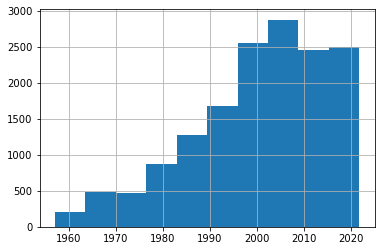

In [10]:
disaster_df.start_date = pd.to_datetime(disaster_df.start_date,errors="coerce")
print(disaster_df.start_date.head(10))
disaster_df.start_date.hist()

## Lets work on disaster_type!

In [11]:
print(disaster_df['disaster_type'].describe())
print(disaster_df['disaster_type'].value_counts())

count     15369
unique       14
top       Flood
freq       5476
Name: disaster_type, dtype: object
Flood                    5476
Storm                    4262
Epidemic                 1474
Earthquake               1243
Landslide                 742
Drought                   738
Extreme temperature       595
Wildfire                  464
Volcanic activity         235
Insect infestation         93
Mass movement (dry)        43
Glacial lake outburst       2
Impact                      1
Animal accident             1
Name: disaster_type, dtype: int64


## Lets look at Countries!

In [12]:
print(disaster_df.country.describe())
disaster_df.country.value_counts()

count                        15369
unique                         227
top       United States of America
freq                           999
Name: country, dtype: object


United States of America                        999
China                                           917
India                                           713
Philippines                                     641
Indonesia                                       552
                                               ... 
United Arab Emirates                              1
Equatorial Guinea                                 1
Saint Helena, Ascension and Tristan da Cunha      1
Brunei Darussalam                                 1
Isle of Man                                       1
Name: country, Length: 227, dtype: int64